In [142]:
import linearsolver as ls
import numpy as np
import matplotlib.pyplot as plt


n = 200
A_ = np.random.normal(size=(n**2)).reshape(n, n)
A = A_.T @ A_
# A = np.array(
#     [
#         [3, 0, -1, -1, 0, -1],
#         [0, 2, 0, -1, 0, 0],
#         [-1, 0, 3, 0, -1, 0],
#         [-1, -1, 0, 2, 0, -1],
#         [0, 0, -1, 0, 3, 1],
#         [-1, 0, 0, -1, -1, 4],
#     ],
#     dtype=float,
# )

x = np.random.normal(size=n)
x0 = np.random.normal(size=n)
b = A @ x
print(np.linalg.cond(A))
x_cg, res = ls.conjGrad(A, x0, b, 1e-7, 3*n, True)
((x_cg - x)**(2)).mean()

37990.32091325245
Condition number of A: 37990.32091325245
It:    20, ||r|| = 29.51835212819787
It:    40, ||r|| = 5.106180953040858
It:    60, ||r|| = 2.1240890248423123
It:    80, ||r|| = 1.9687669959958811
It:   100, ||r|| = 1.0330129781750144
It:   120, ||r|| = 0.7679731294344766
It:   140, ||r|| = 0.2766889873895341
It:   160, ||r|| = 0.25149347382222925
It:   180, ||r|| = 0.24750047308827716
It:   200, ||r|| = 0.11843320421460278
It:   220, ||r|| = 0.09562968475633489
It:   240, ||r|| = 0.03628812245919306
It:   260, ||r|| = 0.03886637150815706
It:   280, ||r|| = 0.05585359627646327
It:   300, ||r|| = 0.04800408442277787
It:   320, ||r|| = 0.0036826604298569763
It:   340, ||r|| = 3.752308042368068e-05
It:   348, ||r|| = 8.295191026557976e-08


1.92483906088625e-21

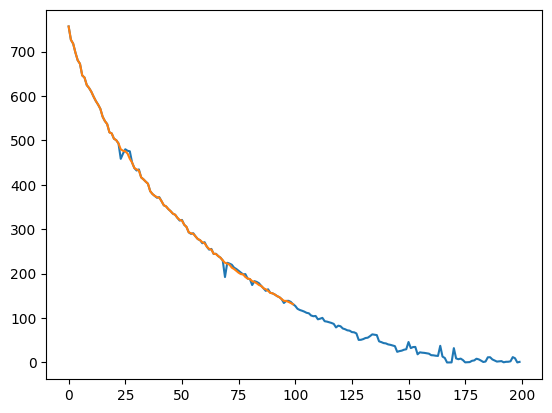

In [175]:
U, S, VT = np.linalg.svd(A)
r= n //2 
Ur, Sr, Vr = U[:, :r], S[:r], VT.T[:, :r]

w, v = np.linalg.eig(A)
plt.plot(w)
plt.plot(Sr)

In [244]:
def proj(Ur, Sr):
    projector = Ur @ Ur.T
    sec = Ur @ np.diag(Sr**(-1)) @ Ur.T
    return projector, sec

pi_A,  pi_U = proj(Ur, Sr)
maxiter=  10*n
second_term = pi_U @ b
pi_A_orth = np.eye(n) - pi_A
A_matrix = A @ pi_A_orth
x_cg_baseline = ls.solve_cg(A, b, maxiter=maxiter, verbose=True)[0]
x_cg_def_lhs = ls.solve_cg(A_matrix, pi_A_orth.T @ b, maxiter=maxiter, verbose=True)[0]
x_cg_def = pi_A_orth @ x_cg_def_lhs + pi_U @ b
print(((x_cg_def - x_cg_baseline)**2).sum())

Condition number of A: 37990.32091325245
It:    20, ||r|| = 18.40070818222638
It:    40, ||r|| = 3.5635435496914956
It:    60, ||r|| = 1.1331422326728955
It:    80, ||r|| = 1.1447287802739858
It:   100, ||r|| = 0.4957234026499184
It:   120, ||r|| = 0.256569432360587
It:   140, ||r|| = 0.24206205979189183
It:   160, ||r|| = 0.13508261381893255
It:   180, ||r|| = 0.14367764416985584
It:   200, ||r|| = 0.08175452048392458
It:   220, ||r|| = 0.06211604615384134
It:   240, ||r|| = 0.017497156844080503
It:   260, ||r|| = 0.05187108873667764
It:   280, ||r|| = 0.0254247330623031
It:   300, ||r|| = 0.022386885007714456
It:   320, ||r|| = 0.00967777226680833
It:   340, ||r|| = 2.5745574129214993e-05
It:   351, ||r|| = 9.093691907686843e-09
Condition number of A: 2.42129104486393e+16
It:    20, ||r|| = 1.7096236806157308
It:    40, ||r|| = 0.46222377412216364
It:    60, ||r|| = 0.13427077079032615
It:    80, ||r|| = 0.09505728400491843
It:   100, ||r|| = 0.011145600215637014
It:   120, ||r|| = 0

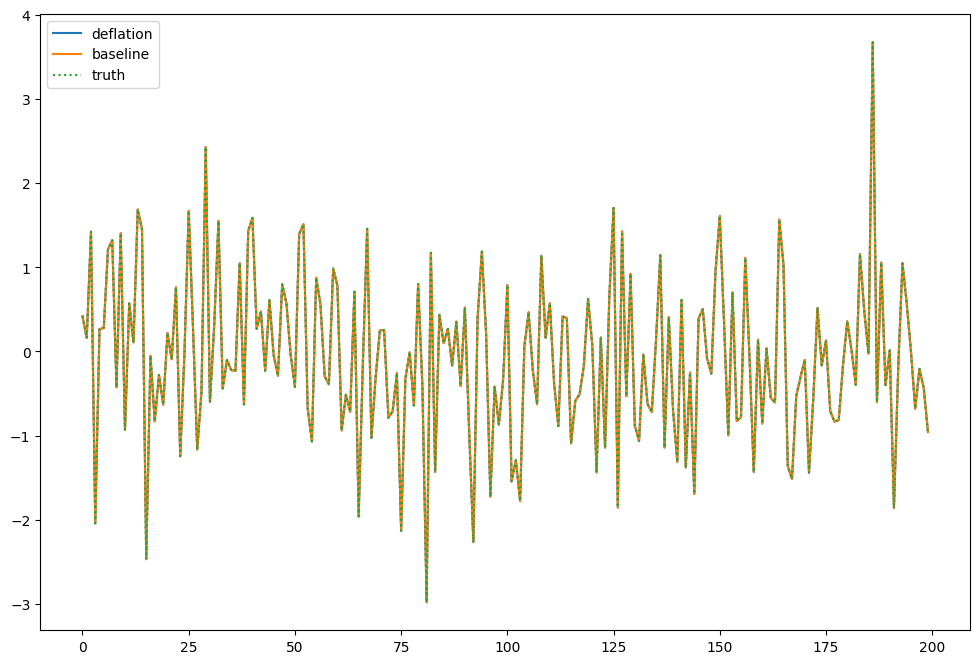

In [243]:
plt.figure(figsize=(12,8))
plt.plot(x_cg_def, label='deflation')
plt.plot(x_cg_baseline, label='baseline')
plt.plot(x, ':', label='truth')
plt.legend()

In [237]:
print(f"{(pi_A_orth @ x - pi_A_orth @ x_cg_def_lhs).max()=}")
print(f"{(pi_A @ x - pi_U @ b).max()=}")

(pi_A_orth @ x - pi_A_orth @ x_cg_def_lhs).max()=2.6023849741818594e-11
(pi_A @ x - pi_U @ b).max()=2.9976021664879227e-15
